<a href="https://colab.research.google.com/github/PrabhatManna/Hotel-Data-analysis/blob/main/Prabhat_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dfset can help you explore those questions!

## <b>This df set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the df. </b>

## <b> Explore and analyze the df to discover important factors that govern the bookings. </b>

In [1]:
# Import all libraries
import pandas as pd # df processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the df
import seaborn as sns # ploting the df
import math # calculation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# load the df
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/EDA-Capstone_Project1/Hotel Bookings.csv')

In [24]:
#checking amount of rows in given dfset to understand the size we are working with
len(df)

119390

In [25]:
df.shape

(119390, 32)

In [26]:
#checking type of every column in the dfset
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [27]:
# Visualize df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [28]:
# df.drop(['id','host_name','last_review'], axis=1, inplace=True)
# Visualize the first 5 rows
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#creating a copy of the data for the cleaning Purpose

In [30]:
df1=df.copy()

#**Lets Find All The Columns With Null Values**

In [35]:
# Determine the number of missing values for every column
df1.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [31]:
df1[df1.duplicated()].shape

(31994, 32)

In [33]:
df1.shape

(87396, 32)

#Now lets Drop The Duplicate Dataset From our Copied Values

In [32]:
df1.drop_duplicates(inplace=True)

In [34]:
#Replacing All NaN Values From The df
#replacing all NaN values in 'children' with 0
df.fillna({'children':0}, inplace=True)
#replacing all NaN values in 'country' with 0
df.fillna({'country':0}, inplace=True)
#replacing all NaN values in 'agent' with 0
df.fillna({'agent':0}, inplace=True)
#replacing all NaN values in 'company' with 0
df.fillna({'company':0}, inplace=True)

In [36]:
# Checking For Any Remaining Values In Every Column
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

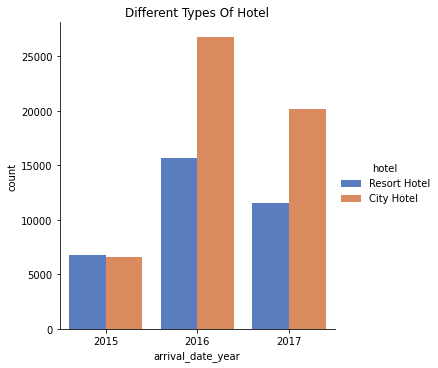

In [57]:
title = 'Different Types Of Hotel'
sns.catplot(x='arrival_date_year', kind="count", hue="hotel", data=df1);
plt.title(title)
plt.ioff()

In [41]:
#examine the dfset
(df[['adults', 'children', 'babies', 'is_repeated_guest', 'agent', 'company', 'total_of_special_requests']]
 .describe())

,adults,children,babies,is_repeated_guest,agent,company,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,1.856403,0.103886,0.007949,0.031912,74.828319,10.775157,0.571363
std,0.579261,0.398555,0.097436,0.175767,107.141953,53.943884,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,152.000000,0.000000,1.000000
max,55.000000,10.000000,10.000000,1.000000,535.000000,543.000000,5.000000


In [42]:
#examine the dfset
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

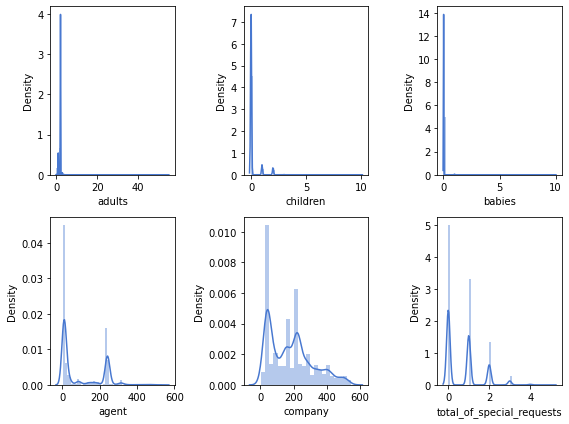

In [44]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.distplot(df1['adults'])

subplot(2,3,2)
sns.distplot(df1['children'])

subplot(2,3,3)
sns.distplot(df1['babies'])

subplot(2,3,4)
sns.distplot(df1['agent'])

subplot(2,3,5)
sns.distplot(df1['company'])

subplot(2,3,6)
sns.distplot(df1['total_of_special_requests'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

In [45]:
df1[df1['company'] >500]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9944,Resort Hotel,1,17,2017,January,4,28,0,1,1,...,Non Refund,NaN,504.0,0,Transient-Party,32.0,0,0,Canceled,2017-01-28
9947,Resort Hotel,1,17,2017,January,4,28,0,1,2,...,Non Refund,NaN,504.0,0,Transient-Party,36.0,0,0,Canceled,2017-01-11
10221,Resort Hotel,1,20,2017,February,8,21,0,2,2,...,No Deposit,NaN,513.0,0,Transient-Party,44.0,0,0,Canceled,2017-02-21
10222,Resort Hotel,1,20,2017,February,8,21,0,2,3,...,No Deposit,NaN,513.0,0,Transient-Party,60.0,0,0,Canceled,2017-02-21
10740,Resort Hotel,1,0,2017,March,13,31,0,1,1,...,No Deposit,NaN,521.0,0,Transient,65.0,0,0,Canceled,2017-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37856,Resort Hotel,0,9,2017,June,26,30,0,1,2,...,No Deposit,NaN,525.0,0,Transient-Party,120.0,0,0,Check-Out,2017-07-01
37857,Resort Hotel,0,86,2017,June,26,30,0,1,2,...,No Deposit,NaN,525.0,0,Transient-Party,134.0,1,0,Check-Out,2017-07-01
37865,Resort Hotel,0,87,2017,July,26,1,0,0,1,...,No Deposit,NaN,525.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-01
37907,Resort Hotel,0,86,2017,June,26,30,0,2,2,...,No Deposit,NaN,525.0,0,Transient,127.0,1,0,Check-Out,2017-07-02


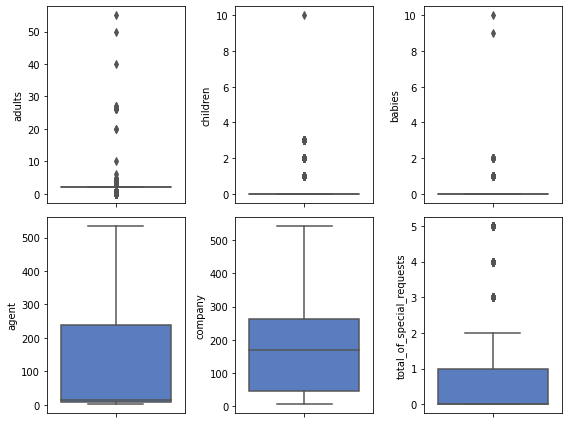

In [48]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = df1['adults']) 

subplot(2,3,2)
sns.boxplot(y = df1['children'])

subplot(2,3,3)
sns.boxplot(y = df1['babies'])

subplot(2,3,4)
sns.boxplot(y = df1['agent'])

subplot(2,3,5)
sns.boxplot(y = df1['company'])

subplot(2,3,6)
sns.boxplot(y = df1['total_of_special_requests'])

plt.tight_layout() # avoid overlap of plots
plt.draw()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


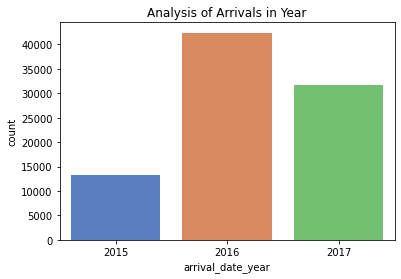

In [47]:
title = 'Analysis of Arrivals in Year'
sns.countplot(df1['arrival_date_year'])
plt.title(title)
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


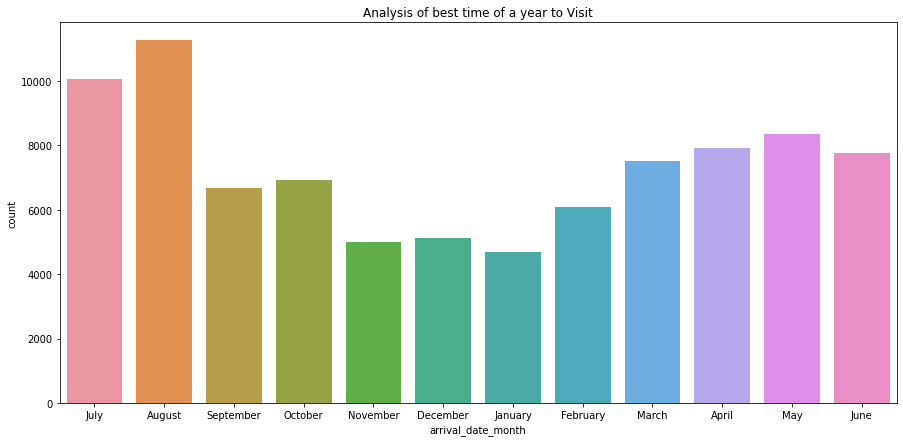

In [46]:
fig = figure(figsize=[15,7])
title = 'Analysis of best time of a year to Visit'
sns.countplot(df1['arrival_date_month'])
plt.title(title)
plt.ioff()

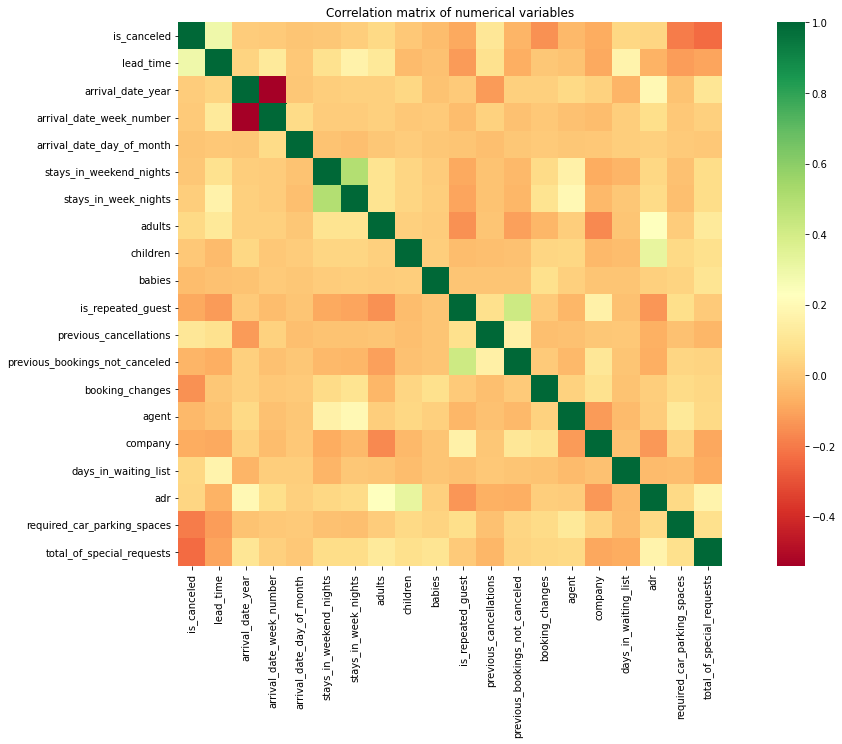

In [51]:
#Correlation
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

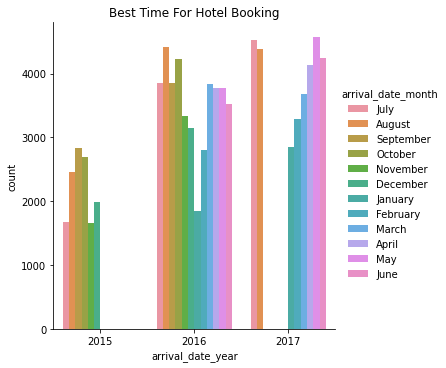

In [55]:
title = 'Best Time For Hotel Booking'
sns.catplot(x='arrival_date_year', kind="count", hue="arrival_date_month", data=df1);
plt.title(title)
plt.ioff()

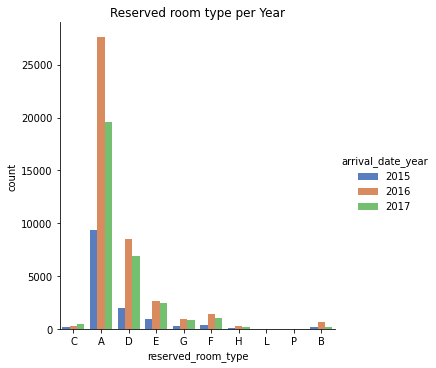

In [56]:
title = 'Reserved room type per Year'
sns.catplot(x='reserved_room_type', kind="count", hue="arrival_date_year", data=df1);
plt.title(title)
plt.ioff()